In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data-final.csv', sep = '\t')

negatives = [ 
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5
    'EST2','EST4',                       # 2
    'AGR1','AGR3','AGR5','AGR7',         # 4
    'CSN2','CSN4','CSN6','CSN8',         # 4
    'OPN2','OPN4','OPN6',                # 3
]

## Some questions count negatives of scores. See codebook.txt for details

df[negatives] = df[negatives].replace({1:5, 2:4, 3:3, 4:2, 5:1})

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,1.0,3.0,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,2.0,3.0,4.0,1.0,3.0,2.0,1.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,4.0,2.0,3.0,4.0,4.0,2.0,2.0,1.0,2.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,3.0,2.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [2]:
# from sklearn.decomposition import PCA as sklearnPCA



In [3]:
a=range(1,11)
ext_cols = [('EXT'+str(i)) for i in a]
est_cols = [('EST'+str(i)) for i in a]
agr_cols = [('AGR'+str(i)) for i in a]
csn_cols = [('CSN'+str(i)) for i in a]
opn_cols = [('OPN'+str(i)) for i in a]

traits = [ext_cols, est_cols, agr_cols, csn_cols, opn_cols]

df_scores = pd.DataFrame(index = df.index)

for trait in traits:
    df_scores = pd.concat([df_scores,(df.loc[:,trait]).sum(axis=1)], axis = 1)
    
df_scores.columns=['EXT', 'EST', 'AGR', 'CSN', 'OPN']

# ext_score = (df.loc[:,ext_cols]).sum(axis=1)
# est_score = (df.loc[:,est_cols]).sum(axis=1)
# agr_score = (df.loc[:,agr_cols]).sum(axis=1)
# csn_score = (df.loc[:,csn_cols]).sum(axis=1)
# opn_score = (df.loc[:,opn_cols]).sum(axis=1)

df_scores = pd.concat([df_scores, df.country], axis = 1)

df_scores.head()

,EXT,EST,AGR,CSN,OPN,country
0,46.0,24.0,39.0,32.0,45.0,GB
1,20.0,25.0,44.0,37.0,35.0,MY
2,25.0,26.0,42.0,34.0,41.0,GB
3,26.0,29.0,38.0,25.0,39.0,GB
4,29.0,19.0,46.0,48.0,48.0,KE


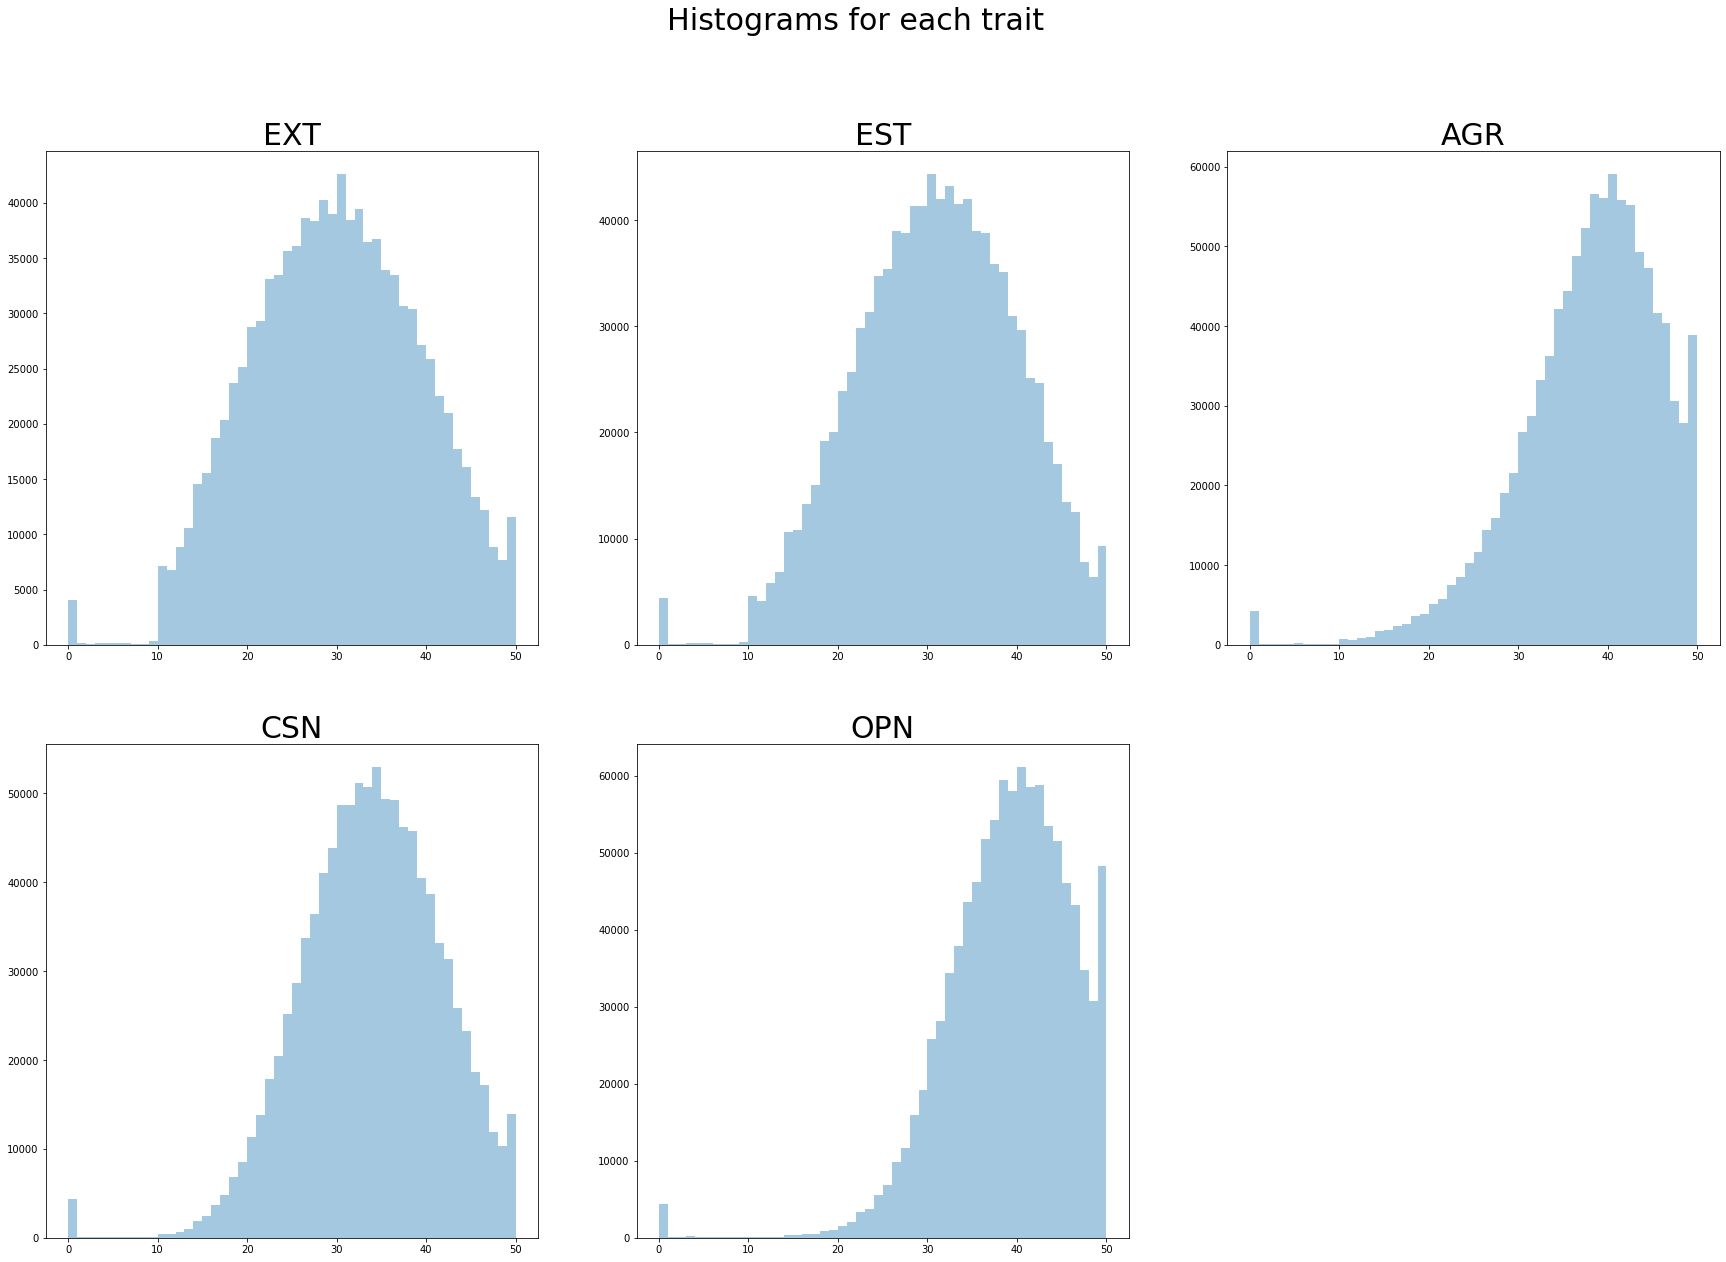

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

hist_plots = plt.figure(figsize=(30,20))

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.title(label=df_scores.columns[i],fontsize=30)
    sns.distplot(df_scores.iloc[:,i], axlabel=False, kde=False)

hist_plots.suptitle('Histograms for each trait', fontsize=30)
plt.show()

In [5]:
from scipy.stats import pearsonr

r, p = pearsonr(df_scores.EXT, df_scores.EST)
print(r,p)

df_scores.iloc[:,0:5].corr()

-0.15340863590780165 0.0


,EXT,EST,AGR,CSN,OPN
EXT,1.000000,-0.153409,0.349428,0.129916,0.230036
EST,-0.153409,1.000000,0.047539,-0.133133,0.031401
AGR,0.349428,0.047539,1.000000,0.241101,0.244405
CSN,0.129916,-0.133133,0.241101,1.000000,0.189804
OPN,0.230036,0.031401,0.244405,0.189804,1.000000


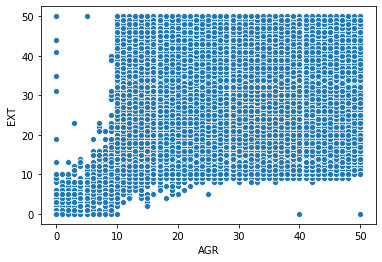

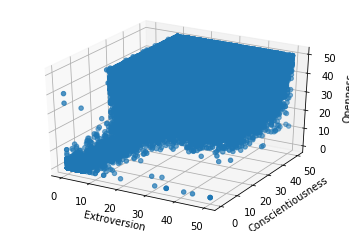

In [6]:
from mpl_toolkits.mplot3d import Axes3D 

scatter_plots = plt.figure()
sns.scatterplot(x=df_scores.AGR, y=df_scores.EXT)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_scores.EXT, df_scores.EST, df_scores.OPN)
ax.set_xlabel('Extroversion')
ax.set_ylabel('Conscientiousness')
ax.set_zlabel('Openness')
plt.show()

In [7]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import scale
# from sklearn import metrics
# from time import time
# import numpy as np

# data=df_scores.iloc[:,:5]


# sample_size=data.shape[0]
# n_target=2
# def bench_k_means(estimator, name, data):
#     t0 = time()
#     estimator.fit(data)
#     print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
#           % (name, (time() - t0), estimator.inertia_,
#              metrics.homogeneity_score(labels, estimator.labels_),
#              metrics.completeness_score(labels, estimator.labels_),
#              metrics.v_measure_score(labels, estimator.labels_),
#              metrics.adjusted_rand_score(labels, estimator.labels_),
#              metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
#              metrics.silhouette_score(data, estimator.labels_,
#                                       metric='euclidean',
#                                       sample_size=sample_size)))


# pca = PCA(n_components=n_target).fit(data)
# bench_k_means(KMeans(init=pca.components_, n_clusters=n_target, n_init=1),
#               name="PCA-based",
#               data=data)

# reduced_data = PCA(n_components=2).fit_transform(data)
# kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(Z, interpolation='nearest',
#            extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#            cmap=plt.cm.Paired,
#            aspect='auto', origin='lower')

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1],
#             marker='x', s=169, linewidths=3,
#             color='w', zorder=10)
# plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

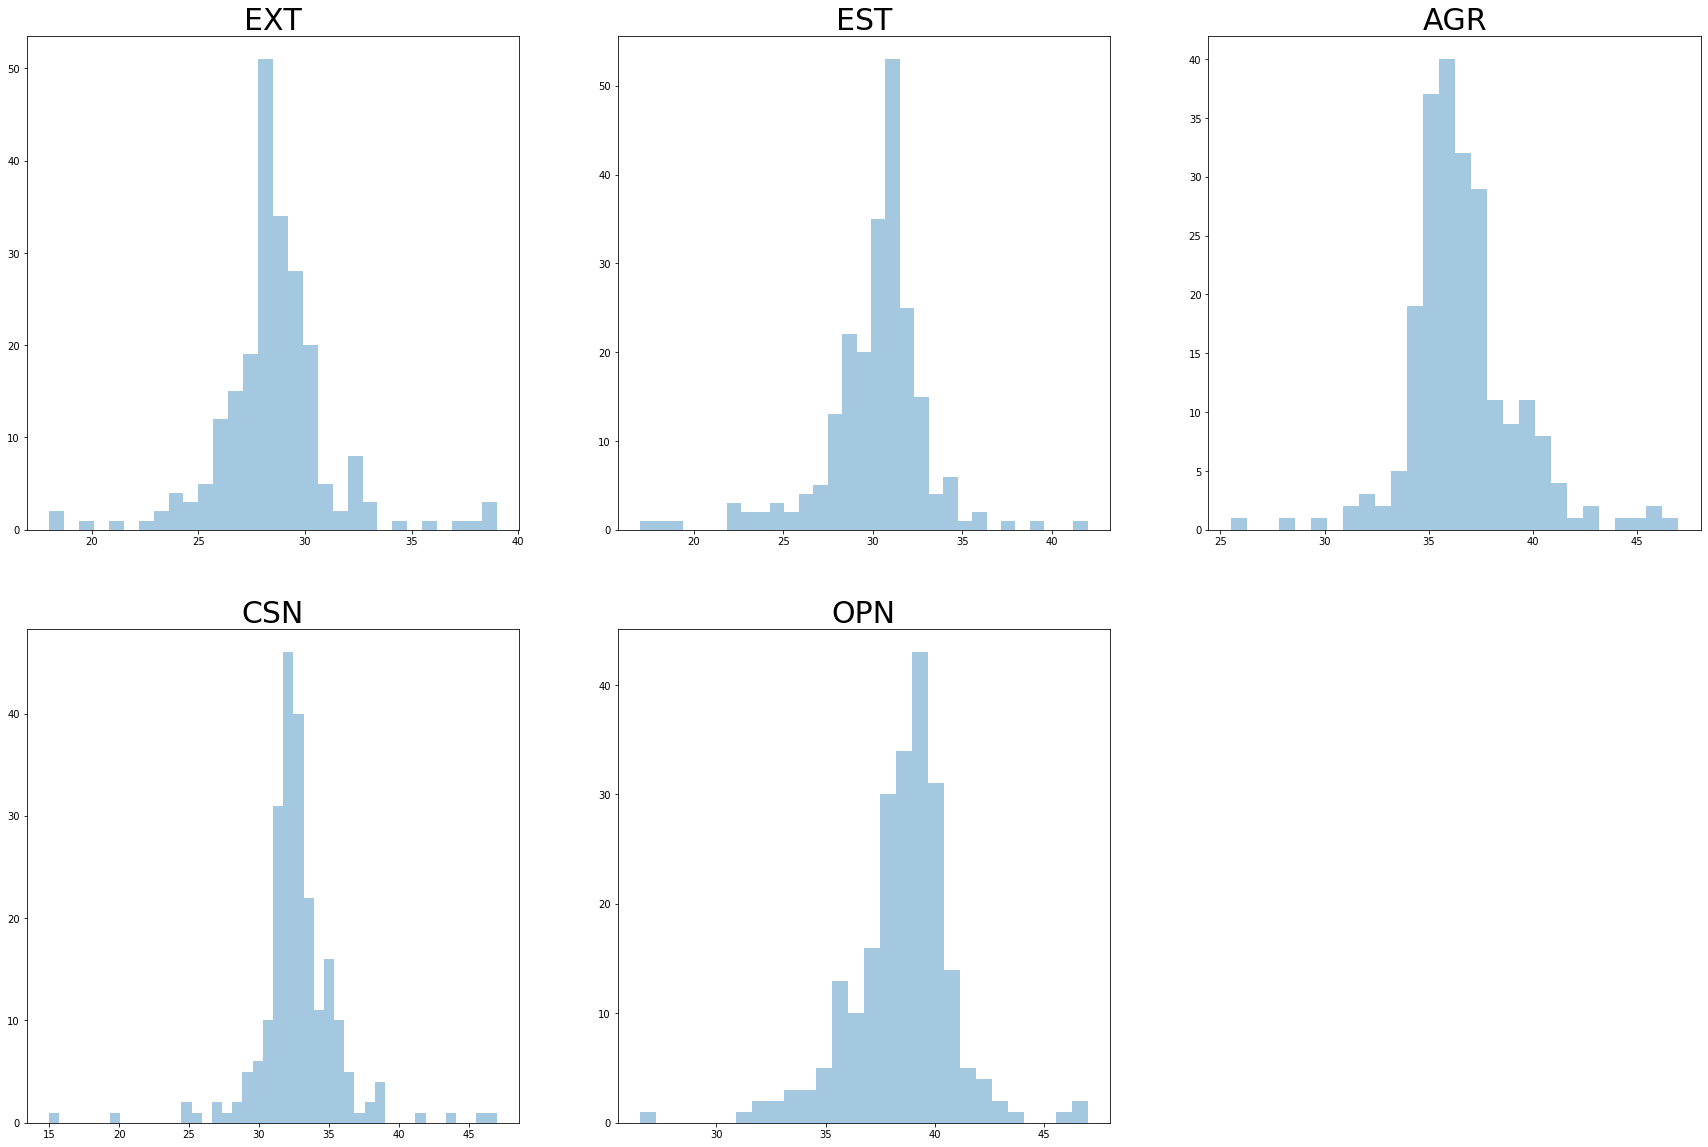

In [8]:
scores_by_country = df_scores.groupby('country').mean()
scores_by_country.head()
# print(scores_by_country.sort_values(by='EXT'))
country_distplots = plt.figure(figsize=(30,20))
for i in range(5):
    plt.subplot(2,3,i+1)
    colname = scores_by_country.columns[i]
    plt.title(label=colname,fontsize=30)
#     sns.barplot(x=scores_by_country.index, y=colname, data = scores_by_country.sort_values(by=colname, ascending=False))
    sns.distplot(scores_by_country.iloc[:,i], axlabel=False, kde=False)

plt.show()

In [9]:
## countries with mean EXT = 0 and mean CSN=50; that is weird


'''
Top and bottom 5 countries for each trait, soecifically above
count of outliers by trait?
k means ??
divide into low outlier and others

'''

for trait in scores_by_country:
    print("countries with maximum average scores for ", trait)
    print(scores_by_country.loc[:,trait].sort_values()[0:5])





countries with maximum average scores for  EXT
country
GN    18.000000
MP    18.166667
FK    20.000000
MF    21.000000
BQ    22.500000
Name: EXT, dtype: float64
countries with maximum average scores for  EST
country
TD    17.00
KM    18.00
FK    19.00
MH    22.00
GA    22.25
Name: EST, dtype: float64
countries with maximum average scores for  AGR
country
BQ    25.500000
MP    28.166667
PM    29.500000
MG    31.500000
AX    31.533333
Name: AGR, dtype: float64
countries with maximum average scores for  CSN
country
GQ    15.000000
NE    20.000000
TG    25.000000
SM    25.000000
XK    25.428571
Name: CSN, dtype: float64
countries with maximum average scores for  OPN
country
BQ    26.500000
PM    31.500000
FK    32.000000
TG    32.333333
BT    32.357143
Name: OPN, dtype: float64


EXT    12689
EST    20125
AGR    35291
CSN    20548
OPN    25777
dtype: int64


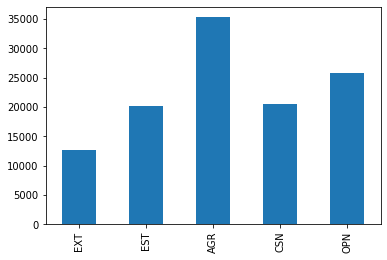

In [10]:
import numpy as np
#count outliers in each trait


zscores = pd.DataFrame(index = df_scores.index)


for trait in list(df_scores.columns[0:5]):
    
    zscores[trait] = (df_scores[trait] - df_scores[trait].mean()) / df_scores[trait].std(ddof=0)
    
# zscores = pd.concat([zscores, df_scores.country], axis = 1)


is_neg_outlier = (zscores < -2)
count_outliers = is_neg_outlier.apply(np.count_nonzero)
count_outliers.columns=['Trait','Negative_Outliers']
print(count_outliers)
count_outliers.plot.bar(x='Trait', y='Negative_Outliers')

is_neg_outlier = pd.concat([is_neg_outlier, df_scores.country], axis = 1)



In [11]:
 

# ext_cat = zscores['EXT'].between(-2,2)
# ext_cat.head()

conditions = [zscores['EXT']<-2, zscores['EXT']>2]
choices = ['low', 'high']

# # conditions = [zscores['EXT']<-2]
# # choices = ['low']


ext_cat = pd.Series(np.select(conditions, choices, default = 'mid'))

# ext_cat.describe()

# ext_anova = pd.concat([EXT_CAT, zscores[['EST','AGR','CSN','OPN']]], axis=1)
# ext_anova.head()

ext_dist = pd.DataFrame(index = zscores.index)
 

# EXT_CAT.head()

ext_dist = pd.concat([ext_cat, zscores[['EST','AGR','CSN','OPN']]], axis=1)
ext_dist.columns = ['EXT_CAT','EST','AGR','CSN','OPN']
ext_dist.head()



,EXT_CAT,EST,AGR,CSN,OPN
0,mid,-0.727590,0.207548,-0.170340,0.931457
1,mid,-0.614090,0.852060,0.475560,-0.507519
2,mid,-0.500589,0.594255,0.088020,0.355867
3,mid,-0.160088,0.078646,-1.074601,0.068071
4,mid,-1.295093,1.109865,1.896541,1.363150


D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


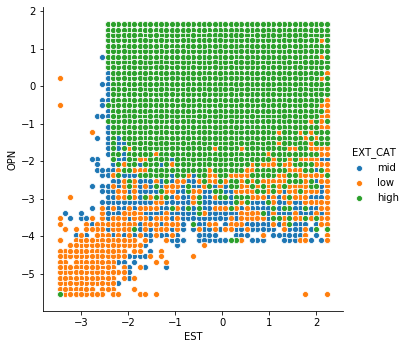

In [12]:
import seaborn as sns
pair_by_ext=sns.pairplot(x_vars=["EST"], y_vars=["OPN"], data=ext_dist, hue="EXT_CAT", size=5)

In [13]:
pair_by_ext.savefig("pair_by_ext.png")

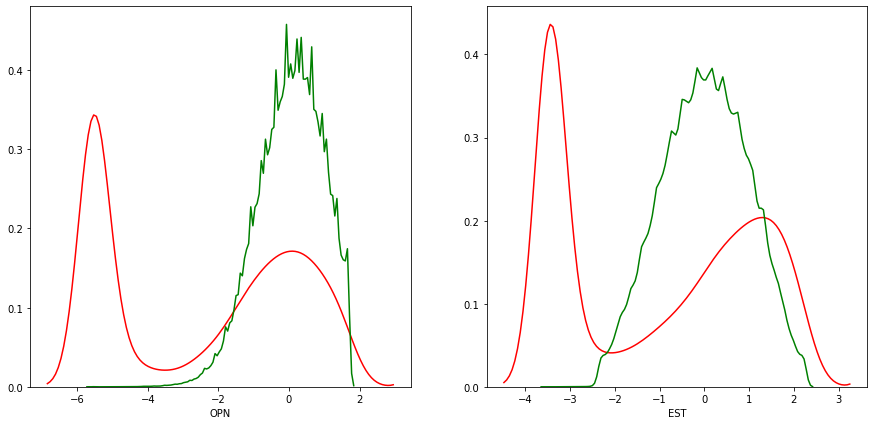

In [14]:
dist_figs=plt.figure(figsize=(15,7))
# for dim in ['OPN','EST']:
plt.subplot(1,2,1)
sns.distplot(ext_dist['OPN'].loc[ext_dist.EXT_CAT=='low'],hist=False,color='r')
sns.distplot(ext_dist['OPN'].loc[ext_dist.EXT_CAT!='low'],hist=False,color='g')

plt.subplot(1,2,2)
sns.distplot(ext_dist['EST'].loc[ext_dist.EXT_CAT=='low'],hist=False,color='r')
sns.distplot(ext_dist['EST'].loc[ext_dist.EXT_CAT!='low'],hist=False,color='g')

Note that a Parametric Test like Anova WILL return significant results, but holds no value due to non-Gaussian distribution of one of the groups
This is even when the other group, as well as the combined distribution, is close to normal.

The tests are run below just as a demonstration that they show significance, even though it is established that they should not be used

In [17]:
from statsmodels.formula.api import ols

results = ols('AGR ~ C(EXT_CAT)', data=ext_dist).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AGR   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                 4.832e+04
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        18:56:51   Log-Likelihood:            -1.3946e+06
No. Observations:             1015341   AIC:                         2.789e+06
Df Residuals:                 1015338   BIC:                         2.789e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5259      0.007     76.241      0.000       0.512       0.539
C(EXT_CAT)[T.low]    -3.0746      0.011   -281.216      0.000      -3.096      -3.053
C(EXT_CAT)[T.mid]    -0.5032      0.007    -72.260      0.000      -0.517      -0.490
==============================================================================
Omnibus:                    56242.637   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66807.004
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                       3.427   Cond. No.                         19.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
df_cat = pd.DataFrame(index = zscores.index)
traits = ['EXT', 'EST', 'AGR', 'CSN', 'OPN']
for trait in traits:
    colname = trait + '_CAT'
    conditions = [zscores[trait]<-1.5, zscores[trait]>1.5]
    choices = ['low', 'high']
    df_cat[colname] = pd.Series(np.select(conditions, choices, default = 'mid'), name = colname)
df_cat.describe()
df_cat.to_csv('traints_cat.csv', index=False)

In [19]:
def assoc_rule(df, condition, rule):
    """
    takes as arguments the dataframe, the condition and the rule.
    for ex assoc rule is : A>>B,C
    Then: condition=A, rule=B,C
    
    Outputs the usual Assoc Rule Mining metrics: support, lift
    """
    n=len(df)
    
    support_num = len(df.loc[condition,:])
    support=support_num/n
    
    occourance=len(df.loc[condition & rule,:])
    confidence_prob=(occourance/support_num)
    confidence=(occourance/support_num)*100
    
    overall_prob=len(df.loc[rule,:])/n
    lift=confidence_prob/overall_prob
    
    return support, confidence, lift
    
    
    

In [24]:
support, confidence, lift=assoc_rule(df_cat, df_cat.EXT_CAT=='low', df_cat.OPN_CAT=='low')

print(support,confidence, lift)

0.06786389991145832 19.502213192076045 2.8270747044138775


In [27]:
support, confidence, lift=assoc_rule(df_cat, df_cat.EXT_CAT=='low', df_cat.EST_CAT=='low')

print(support,confidence, lift)

0.06786389991145832 12.2385893621653 1.6170025975393345
